In [1]:
# predict humidity at 3 pm

# *Problem statement:
    Create a model that will help me predict relative humidity at 3 pm

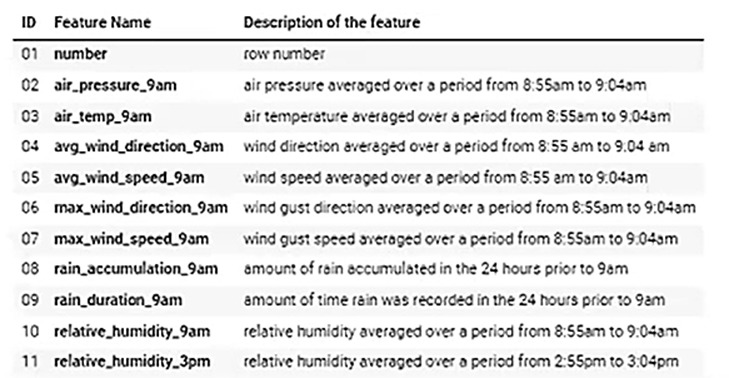

In [4]:
import pandas as pd 
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [3]:
data=pd.read_csv("daily_weather.csv")
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'daily_weather.csv'

In [ ]:
data.shape
#rows = 1095 col=11

In [ ]:
data.info()

In [ ]:
#find missing value
data.isna().sum()

In [ ]:
# data.fillna({"air_pressure_9am":data["air_pressure_9am"].median(),
#             "air_temp_9am":data["air_temp_9am"].median(),
#             "avg_wind_direction_9am":data["avg_wind_direction_9am"].median(),
#             "avg_wind_speed_9am":data["avg_wind_speed_9am"].median(),
#             "max_wind_direction_9am":data["max_wind_direction_9am"].median(),
#             "max_wind_speed_9am":data["max_wind_speed_9am"].median(),
#             "rain_accumulation_9am":data["rain_accumulation_9am"].median(),
#             "rain_duration_9am":data["rain_duration_9am"].median()},inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
data.columns

In [ ]:
col_missing_value=['air_pressure_9am', 'air_temp_9am', 'avg_wind_direction_9am',
       'avg_wind_speed_9am', 'max_wind_direction_9am', 'max_wind_speed_9am',
       'rain_accumulation_9am', 'rain_duration_9am']

In [ ]:
for col in col_missing_value:
    md=data[col].median()
    print(f"median value in {md} of column is {col}")
    data.fillna({col:md},inplace=True)

In [ ]:
data.isna().sum()

In [ ]:
x=data.drop(["number","relative_humidity_3pm"],axis=1)
x.head()

In [ ]:
y=data["relative_humidity_3pm"]
y

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3243287,shuffle=True)
print(f"x_train{x_train.shape}")
print(f"y_train{y_train.shape}")
print(f"x_test{x_test.shape}")
print(f"y_test{y_test.shape}")

In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [ ]:
dtr=DecisionTreeRegressor(min_samples_split=150,max_depth=4)
#train model
dtr.fit(x_train,y_train)
# evaluate model
y_pred=dtr.predict(x_test)
y_pred

In [ ]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [ ]:
rmse=sqrt(mean_squared_error(y_test,y_pred))
rmse

In [ ]:
from sklearn.metrics import r2_score
r_squere=r2_score(y_test,y_pred)
r_squere

In [ ]:
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_tree=export_graphviz(decision_tree=dtr,
                        filled=True,
                        rounded=True,
                        special_characters=True )
graph=pydotplus.graph_from_dot_data(dot_tree)
Image(graph.create_png())

In [ ]:
import pickle

In [ ]:
pickle.dump(dtr,open("weather_dtr.pkl","wb"))

In [ ]:
x_test.columns

In [ ]:
# 9

In [ ]:
x_test.describe(())

In [ ]:
x_test.dtypes

In [ ]:
data["classify"]=data["relative_humidity_3pm"]>=data["relative_humidity_3pm"].median()

In [ ]:
data.dtype

In [ ]:
data["classify"].astype("int64")

In [ ]:
y_v1=data["classify"]